Author : NZOOH CHEGUI Aloys Aymrick



## Presentation of Dataset

The Titanic Dataset contains informations about Titanic passenger and wether they survived or not.

The problematic is: "we want to predict wether a passenger survived or not".

### Data dictionnary
- survival :	Survival	(0 = No, 1 = Yes)
- pclass	: Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
- sex	: Sex
- Age	: Age in years
- sibsp :	number of siblings / spouses aboard the Titanic
- parch	: number of parents / children aboard the Titanic
- ticket	: Ticket number
- fare	: Passenger fare	(money spent for the ticket)
- cabin	: Cabin number
- embarked	: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

### Start by importing the librairies


In [1]:
# Data vizualisation
import matplotlib.pyplot as plt
import seaborn as sns 

# Data preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data preparation

### Read the dataset

In [13]:
# Load data
titanic = pd.read_csv("titanic.csv")

### Explore the dataset

In [14]:
# First look at the data
print(titanic.head())
print(titanic.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [22]:
# Get some information
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Clean the dataset - Missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


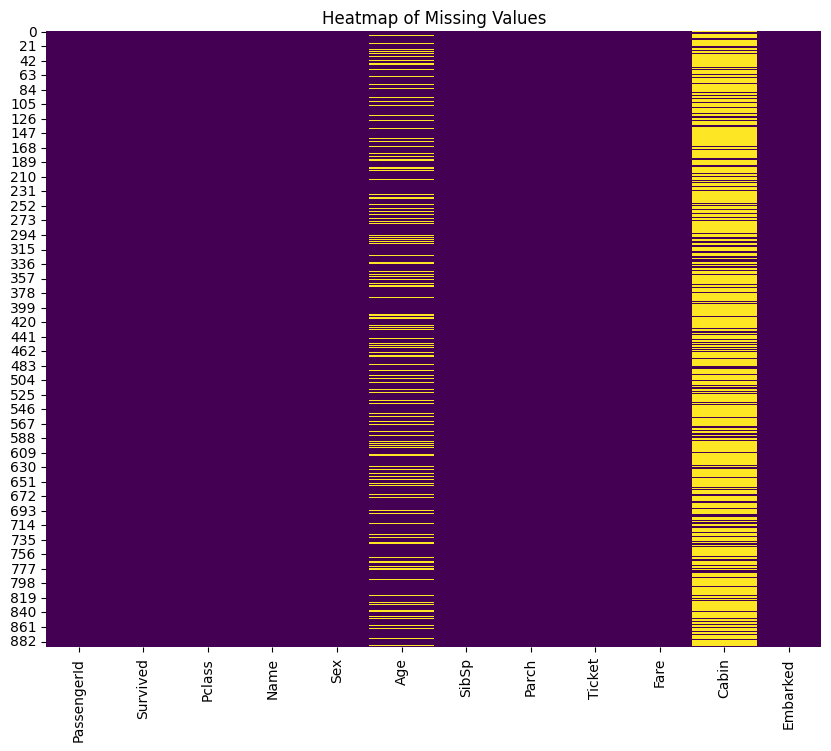

In [17]:
# Check for missing values
missing_values = titanic.isnull().sum()
print(missing_values)

# Generation of a heatmap of missing values
plt.figure(figsize=(10,8))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Report it in blackboard (Q8)


In [18]:
# Deal with the missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Remove the column with more than 75% of missing values
total_values = len(titanic)
cols_to_drop = [col for col in missing_values.index if missing_values[col] / total_values > 0.75]
titanic = titanic.drop(cols_to_drop, axis=1)



In [19]:
# Deal with the missing values
# Remove the remaining rows with missing values
titanic = titanic.dropna()


In [23]:
# Get the final shape of the dataset and report it in Blackboard (Q9)
shape = titanic.shape
print("Shape = {}".format(shape))

missing_values = titanic.isnull().sum()
print(missing_values)




Shape = (889, 11)
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Data visualization 

c:\Users\aymer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


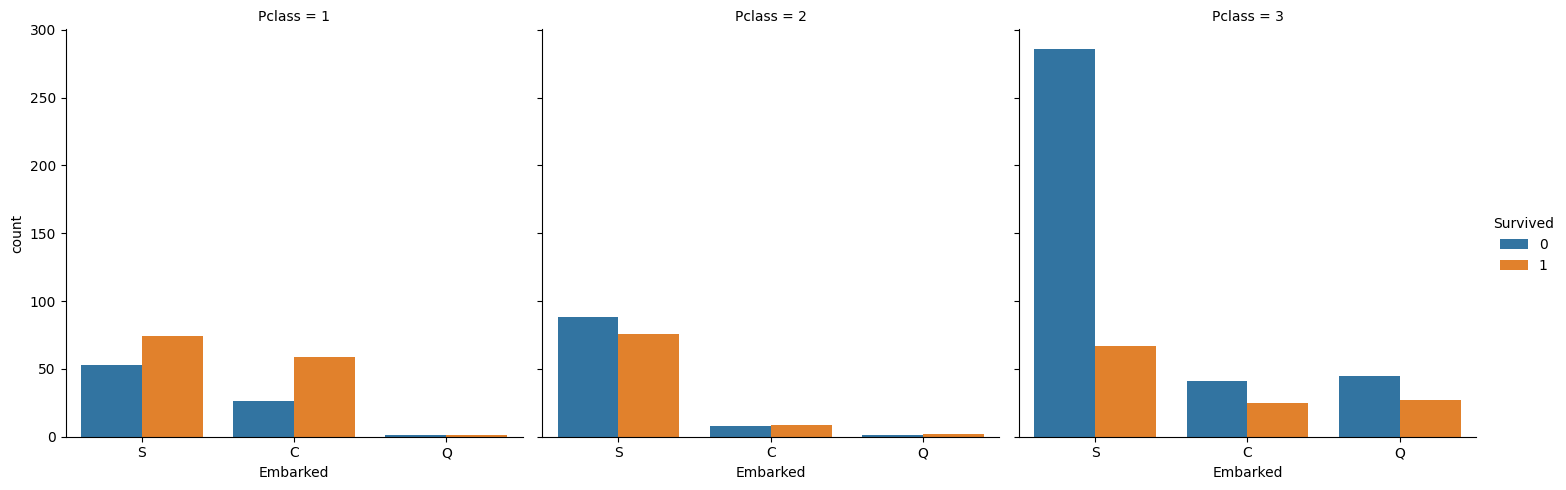

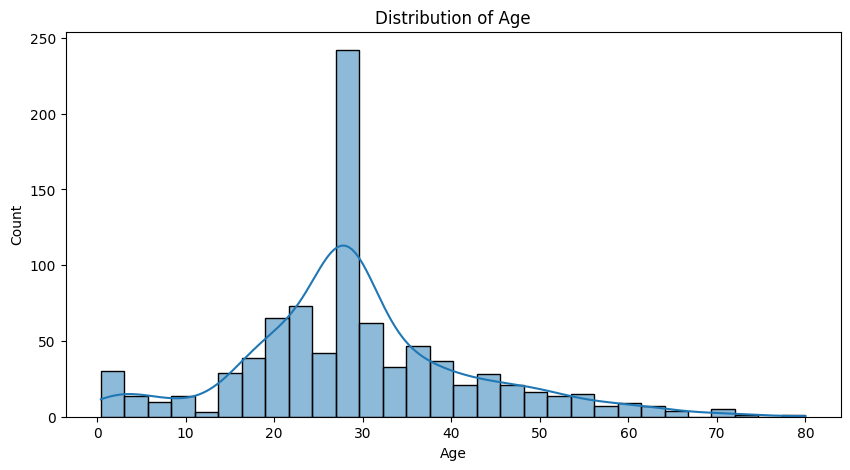

In [24]:
# Data visualization (Q10)
# Make a plot and analyze it. Use the library you prefer.
##Here I will use the library seaborn
#Creation of countplot: I created a countplot for the 'Embarked' column color-coded by 'Survived' status
sns.catplot(x='Embarked', hue='Survived', kind='count', col='Pclass', data=titanic)

#Visualize the distribution of 'Age'
plt.figure(figsize=(10,5))
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

# Report the figure and your analysis in blackboard
# Your figure should be self-supporting (everyone can understand it without access to the code: including the title, and legend...)


<Axes: xlabel='Survived', ylabel='Pclass'>

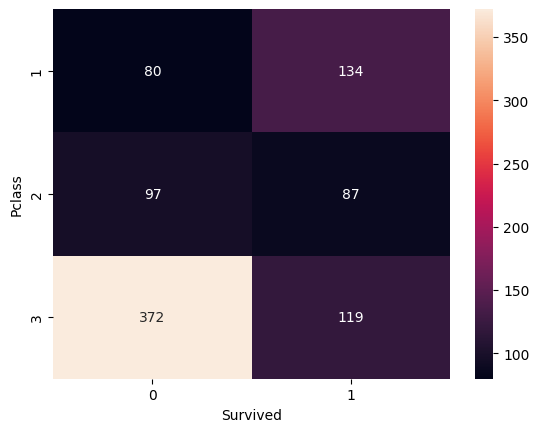

In [25]:
#Heatmap of the survived column compared to Pclass column
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot=True, fmt="d")


### Prepare your data for model training



In [26]:
# Deal with non numeric features
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})


# Drop the "Name" and "Ticket" columns
titanic = titanic.drop(['Name', 'Ticket'], axis=1)



In [27]:
# Deal with non numeric features
# Option 1 : Convert the remaining column by mapping the values to numbers (use map from Pandas for example)
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Option 2 (easy) : Remove all non numeric columns


In [28]:
# Get the features and label in two variables.
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']



In [29]:
# Split the features and label in train and test set
# Put 20% of the data in the test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)



In [30]:
# Check the shape of each set (Q11)
print("Training Set Shape = ", X_train.shape)
print("Test Set Shape = ", X_test.shape)


Training Set Shape =  (711, 8)
Test Set Shape =  (178, 8)


## Model Training 

In [31]:
# Define and train a Random Forest (Report your code in Q13)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

## Model Evaluation

In [32]:
# Use your model to make predictions on the test set (Report your code in Q14)
y_pred = rf.predict(X_test)


In [33]:
# Use the classification report to evaluate your model
print(classification_report(y_test, y_pred))

# Report the accuracy in blackboard (Q15)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



              precision    recall  f1-score   support

           0       0.80      0.87      0.83       113
           1       0.73      0.63      0.68        65

    accuracy                           0.78       178
   macro avg       0.77      0.75      0.76       178
weighted avg       0.78      0.78      0.78       178

Accuracy: 0.7808988764044944
